<h1> Book Recommender <h1>
<h3> The focus of this project is to build a simple and straightforward Book Recommender using similarity as our driver for suggestions </h3>

1. Load Data
2. Investigate Ratings 
3. Look at Country Data (Canada/USA)
4. P. Corr with Ratings
5. K-Nearest Neighbours
6. Perform Cosine Similarity
7. Evalulate agansit P. Corr

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# book_rating_path = "/workspaces/ProjectPortfolio/1. Data Science/2. KNN - Book Recommender/Datasets/BX-Book-Ratings.csv"
# book_path = "/workspaces/ProjectPortfolio/1. Data Science/2. KNN - Book Recommender/Datasets/BX-Books.csv"
# book_user_path = "/workspaces/ProjectPortfolio/1. Data Science/2. KNN - Book Recommender/Datasets/BX-Users.csv"

book_rating_path = "./Datasets/BX-Book-Ratings.csv"
book_path = "./Datasets/BX-Books.csv"
book_user_path = "./Datasets/BX-Users.csv"

books = pd.read_csv(book_path, sep=';', on_bad_lines="skip", encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']

users = pd.read_csv(book_user_path, sep=';', on_bad_lines="skip", encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']

ratings = pd.read_csv(book_rating_path, sep=';', on_bad_lines="skip", encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

C:\Users\marty\AppData\Local\Temp\ipykernel_29012\2485013152.py:14: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv(book_path, sep=';', on_bad_lines="skip", encoding="latin-1")


In [29]:
print(f"""Shape of Ratings:\n{ratings.shape} \n\nRatings Data Types: \n{ratings.dtypes} \n\nRatings DF:\n{ratings.head()}""")

Shape of Ratings:
(1149780, 3) 

Ratings Data Types: 
userID         int64
ISBN          object
bookRating     int64
dtype: object 

Ratings DF:
   userID        ISBN  bookRating
0  276725  034545104X           0
1  276726  0155061224           5
2  276727  0446520802           0
3  276729  052165615X           3
4  276729  0521795028           6


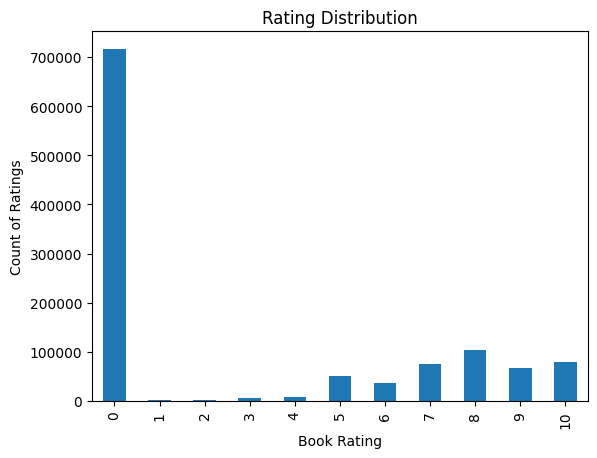

In [30]:
ratings['bookRating'].value_counts(sort=False).sort_index().plot(kind='bar')
plt.title('Rating Distribution')
plt.xlabel('Book Rating')
plt.ylabel('Count of Ratings')
plt.show()

<h3> If we look at the top ratings and the average rating per book. We can see that the 0-rating greatly influences that rating of a book. <br>
The top rated book has a rating of 1/10 which seems unlikely.</h3>

In [31]:
rating_count = pd.DataFrame(ratings.groupby('ISBN')['bookRating'].count())
rating_count['averageRating'] = pd.DataFrame(ratings.groupby('ISBN')['bookRating'].mean())
rating_count.sort_values('bookRating',ascending=False).head()

,bookRating,averageRating
ISBN,,
0971880107,2502,1.019584
0316666343,1295,4.468726
0385504209,883,4.652322
0060928336,732,3.448087
0312195516,723,4.334716


<h3> The top rated book is Wild Animus which when found on Amazon customer reviews shows a 3.5/5. If scaled to a 10 point rating that would be a 7/10. <br>
This indicates to me that the 0-point ratings should be dropped to reduce size and improve reliability of the scores</h3>

In [32]:
most_rated_books = pd.DataFrame(['0971880107', '0316666343', '0385504209', '0060928336', '0312195516'], index=np.arange(5), columns = ['ISBN'])
most_rated_books_summary = pd.merge(most_rated_books, books, on='ISBN')
most_rated_books_summary[most_rated_books_summary.columns[:5]]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0971880107,Wild Animus,Rich Shapero,2004,Too Far
1,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
2,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday
3,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial
4,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA


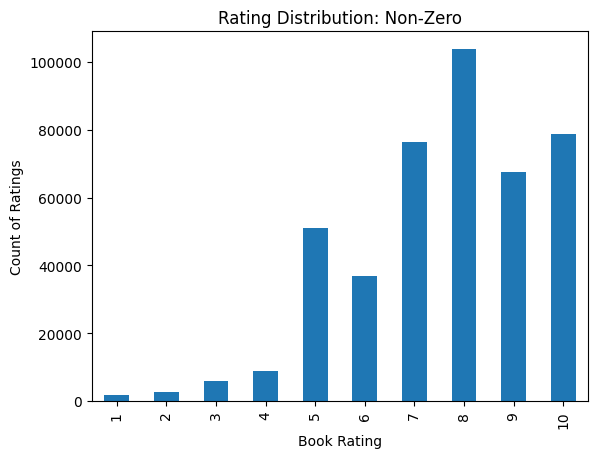

In [33]:
ratings_non_zero = ratings[ratings['bookRating'] > 0].reset_index()
ratings_non_zero['bookRating'].value_counts(sort=False).sort_index().plot(kind='bar')
plt.title('Rating Distribution: Non-Zero')
plt.xlabel('Book Rating')
plt.ylabel('Count of Ratings')
plt.show()

<h3> <i>The Lovely Bones: A Novel</i> is now our top-rated and when compared to Amazon's review rating it is scored as 8.8/10 which is close to the 8.1/10 below. <br>
<i> Wild Animus</i> however went from 1/10 to 4.4/10 which is not as close to the 7/10 we identified earlier. <br>
My goal however is not to match the Amazon review ratings, but simply to adjust the dataframe to provide more realistic results.<br>
Since this change has acomplished that, I will proceed with this adjustment.
</h3>

In [34]:
rating_count_non_zero = pd.DataFrame(ratings_non_zero.groupby('ISBN')['bookRating'].count())
rating_count_non_zero['averageRating'] = pd.DataFrame(ratings_non_zero.groupby('ISBN')['bookRating'].mean())
most_rated_books_summary = pd.merge(rating_count_non_zero, books, on='ISBN')
most_rated_books_summary[most_rated_books_summary.columns[:5]].sort_values('bookRating',ascending=False).head()

,ISBN,bookRating,averageRating,bookTitle,bookAuthor
21513,0316666343,707,8.185290,The Lovely Bones: A Novel,Alice Sebold
115488,0971880107,581,4.390706,Wild Animus,Rich Shapero
38171,0385504209,487,8.435318,The Da Vinci Code,Dan Brown
17674,0312195516,383,8.182768,The Red Tent (Bestselling Backlist),Anita Diamant
4048,0060928336,320,7.887500,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells


In [35]:
print(ratings_non_zero.bookRating.count())
print(len(ratings_non_zero['ISBN'].value_counts()))

433671
185973


<h3> Next I'll be looking at the porportion of books with only 1 rating for the book. The rating of a book is dictated by the one user and thus can provide a poor representation of the quality </h3>

In [36]:
isbn_counts = ratings_non_zero['ISBN'].value_counts()

ratings = 2
isbn_counts_less_than = len(isbn_counts[isbn_counts < ratings])

print(f"Number of ISBNs with less than {ratings} ratings: {isbn_counts_less_than}")
print(f"Total number of ISBNs with a rating: {len(isbn_counts)}")
print(f"% of ISBN's with less than {ratings} ratings: {((isbn_counts_less_than / len(isbn_counts))*100):.4}%")


Number of ISBNs with less than 2 ratings: 129621
Total number of ISBNs with a rating: 185973
% of ISBN's with less than 2 ratings: 69.7%


In [37]:
isbn_counts_more_than_1 = isbn_counts[isbn_counts > 1]
valid_isbns = isbn_counts_more_than_1.index.tolist()
filtered_df = ratings_non_zero[ratings_non_zero['ISBN'].isin(valid_isbns)]
filtered_df.shape

(304050, 4)

<h3> I'm going to start fresh by establishing a new df indicating the adjustment that has been made.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# book_rating_path = "/workspaces/ProjectPortfolio/1. Data Science/2. KNN - Book Recommender/Datasets/BX-Book-Ratings.csv"
# book_path = "/workspaces/ProjectPortfolio/1. Data Science/2. KNN - Book Recommender/Datasets/BX-Books.csv"
# book_user_path = "/workspaces/ProjectPortfolio/1. Data Science/2. KNN - Book Recommender/Datasets/BX-Users.csv"

book_rating_path = "./Datasets/BX-Book-Ratings.csv"
book_path = "./Datasets/BX-Books.csv"
book_user_path = "./Datasets/BX-Users.csv"

books = pd.read_csv(book_path, sep=';', on_bad_lines="skip", encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']

users = pd.read_csv(book_user_path, sep=';', on_bad_lines="skip", encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']

ratings = pd.read_csv(book_rating_path, sep=';', on_bad_lines="skip", encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

C:\Users\marty\AppData\Local\Temp\ipykernel_23832\2485013152.py:14: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv(book_path, sep=';', on_bad_lines="skip", encoding="latin-1")


In [3]:
rating_df = ratings[ratings['bookRating'] > 0].reset_index(inplace=False,drop=True)

isbn_counts = rating_df['ISBN'].value_counts() # Identifies Unique Book Entries
isbn_counts_over_1 = isbn_counts[isbn_counts > 1] # Books with more than 1 rating are stored
valid_isbns = isbn_counts_over_1.index.tolist() # Rearranged into a list

rating_df = rating_df[rating_df['ISBN'].isin(valid_isbns)] # Fitler rating_df to only include books with more than 1 rating

In [9]:
rating_df = rating_df.merge(users, left_on = 'userID', right_on = 'userID', how = 'left')

us_canada_user_rating = rating_df[rating_df['Location'].str.contains("usa|canada")]

In [11]:
from scipy.sparse import csr_matrix
us_canada_user_rating = us_canada_user_rating.drop_duplicates(['userID', 'bookTitle'])
us_canada_user_rating_pivot = us_canada_user_rating.pivot(index = 'bookTitle', columns = 'userID', values = 'bookRating').fillna(0)
us_canada_user_rating_matrix = csr_matrix(us_canada_user_rating_pivot.values)

from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(us_canada_user_rating_matrix)

KeyError: Index(['bookTitle'], dtype='object')

In [10]:
us_canada_user_rating.head()

,userID,ISBN,bookRating,Location_x,Age_x,Location_y,Age_y,Location,Age
1,276744,038550120X,7,"torrance, california, usa",NaN,"torrance, california, usa",NaN,"torrance, california, usa",NaN
2,276747,0060517794,9,"iowa city, iowa, usa",25.0,"iowa city, iowa, usa",25.0,"iowa city, iowa, usa",25.0
3,276747,0671537458,9,"iowa city, iowa, usa",25.0,"iowa city, iowa, usa",25.0,"iowa city, iowa, usa",25.0
4,276747,0679776818,8,"iowa city, iowa, usa",25.0,"iowa city, iowa, usa",25.0,"iowa city, iowa, usa",25.0
6,276754,0684867621,8,"alberta beach, alberta, canada",19.0,"alberta beach, alberta, canada",19.0,"alberta beach, alberta, canada",19.0


In [4]:
ratings_pivot = rating_df.pivot_table(index='userID', columns='ISBN', values='bookRating', aggfunc='mean').fillna(0)

userID = ratings_pivot.index
ISBN = ratings_pivot.columns
print(ratings_pivot.shape)
ratings_pivot.head()

l:\ProjectPortfolio\.venv\Lib\site-packages\pandas\core\reshape\reshape.py:143: RuntimeWarning: overflow encountered in scalar multiply
  num_cells = num_rows * num_columns


ValueError: negative dimensions are not allowed

In [ ]:
counts1 = ratings['userID'].value_counts()
counts1.describe()


In [ ]:
ratings = ratings[ratings['userID'].isin(counts1[counts1 >= 200].index)]
counts = ratings['bookRating'].value_counts()
ratings = ratings[ratings['bookRating'].isin(counts[counts >= 100].index)]

In [ ]:
ratings_pivot = ratings.pivot(index='userID', columns='ISBN').bookRating.fillna(0)
userID = ratings_pivot.index
ISBN = ratings_pivot.columns
print(ratings_pivot.shape)
ratings_pivot.head()

In [ ]:
bones_ratings = ratings_pivot['0316666343']
similar_to_bones = ratings_pivot.corrwith(bones_ratings)
corr_bones = pd.DataFrame(similar_to_bones, columns=['pearsonR'])
corr_bones.dropna(inplace=True)
corr_summary = corr_bones.join(rating_count['ratingCount'])
corr_summary[corr_summary['ratingCount']>=30].sort_values('pearsonR', ascending=False).head(10)

In [ ]:
books_corr_to_bones = pd.DataFrame(['0312291639', '0316601950', '0446610038', '0446672211', '0385265700', '0345342968', '0060930535', '0375707972', '0684872153'], 
                                  index=np.arange(9), columns=['ISBN'])
corr_books = pd.merge(books_corr_to_bones, books, on='ISBN')
corr_books

In [ ]:
combine_book_rating = pd.merge(ratings, books, on='ISBN')
columns = ['yearOfPublication', 'publisher', 'bookAuthor', 'imageUrlS', 'imageUrlM', 'imageUrlL']
combine_book_rating = combine_book_rating.drop(columns, axis=1)
combine_book_rating.head()

In [ ]:
combine_book_rating = combine_book_rating.dropna(axis = 0, subset = ['bookTitle'])

book_ratingCount = (combine_book_rating.
     groupby(by = ['bookTitle'])['bookRating'].
     count().
     reset_index().
     rename(columns = {'bookRating': 'totalRatingCount'})
     [['bookTitle', 'totalRatingCount']]
    )
book_ratingCount.head()

In [ ]:
rating_with_totalRatingCount = combine_book_rating.merge(book_ratingCount, left_on = 'bookTitle', right_on = 'bookTitle', how = 'left')
rating_with_totalRatingCount.head()

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(book_ratingCount['totalRatingCount'].describe())

In [ ]:
print(book_ratingCount['totalRatingCount'].quantile(np.arange(.9, 1, .01)))

In [ ]:
popularity_threshold = 5
rating_popular_book = rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_book.head()

In [ ]:
combined = rating_popular_book.merge(users, left_on = 'userID', right_on = 'userID', how = 'left')

us_canada_user_rating = combined[combined['Location'].str.contains("usa|canada")]
us_canada_user_rating=us_canada_user_rating.drop('Age', axis=1)
us_canada_user_rating.head()

In [ ]:
from scipy.sparse import csr_matrix
us_canada_user_rating = us_canada_user_rating.drop_duplicates(['userID', 'bookTitle'])
us_canada_user_rating_pivot = us_canada_user_rating.pivot(index = 'bookTitle', columns = 'userID', values = 'bookRating').fillna(0)
us_canada_user_rating_matrix = csr_matrix(us_canada_user_rating_pivot.values)

from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(us_canada_user_rating_matrix)

In [ ]:
query_index = np.random.choice(us_canada_user_rating_pivot.shape[0])

# Get the user's ratings as a 1D array (without reshaping)
user_ratings = us_canada_user_rating_pivot.iloc[query_index, :]

# Use user_ratings directly with kneighbors
distances, indices = model_knn.kneighbors([user_ratings], n_neighbors=6)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(us_canada_user_rating_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, us_canada_user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

In [ ]:
us_canada_user_rating_pivot2 = us_canada_user_rating.pivot(index = 'userID', columns = 'bookTitle', values = 'bookRating').fillna(0)
us_canada_user_rating_pivot2.head()

In [ ]:
us_canada_user_rating_pivot2.shape

In [ ]:
X = us_canada_user_rating_pivot2.values.T
X.shape

In [ ]:
import sklearn
from sklearn.decomposition import TruncatedSVD

SVD = TruncatedSVD(n_components=12, random_state=17)
matrix = SVD.fit_transform(X)
matrix.shape

In [ ]:
import warnings
warnings.filterwarnings("ignore",category =RuntimeWarning)
corr = np.corrcoef(matrix)
corr.shape

In [ ]:
us_canada_book_title = us_canada_user_rating_pivot2.columns
us_canada_book_list = list(us_canada_book_title)
coffey_hands = us_canada_book_list.index("M Is for Malice")
print(coffey_hands)

In [ ]:
corr_coffey_hands  = corr[coffey_hands]
list(us_canada_book_title[(corr_coffey_hands > 0.94)])